In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


In [4]:
import numpy as np

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features
y = abalone.data.targets

#X = pd.get_dummies(X, columns=['Sex'])
X = X.drop(columns=['Sex'])

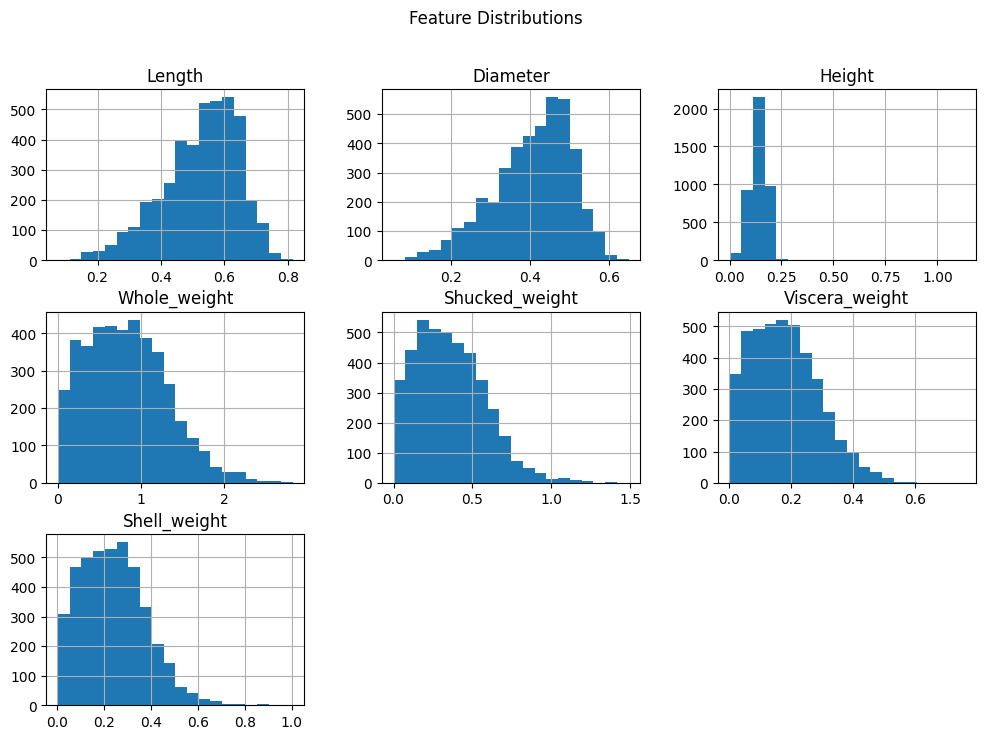

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

X.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

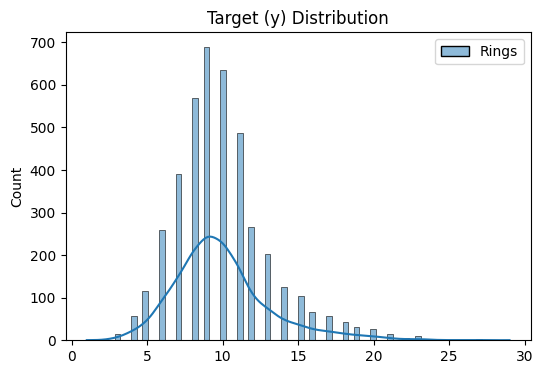

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

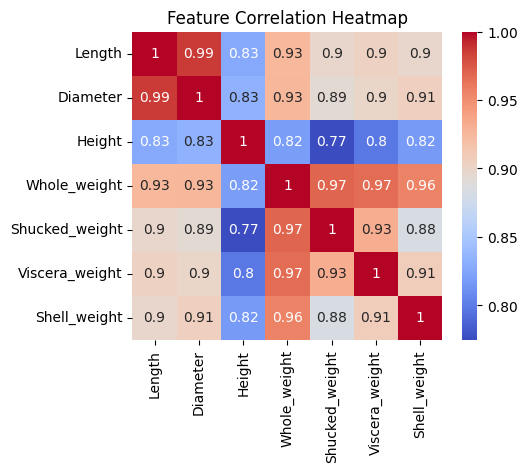

In [7]:
plt.figure(figsize=(5, 4))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
X = X.values.astype(float)
y = np.array(y).astype(np.float32).reshape(-1)

In [9]:
ndpost=1000
nskip=1000
n_trees=5

In [10]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=10, n_chains=4, ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.102709                 1.226466             2.184933   
1                  1.261984                 1.116099             1.978147   
2                  1.109425                 1.198519             2.336365   
3                  1.172613                 1.411261             2.011840   
4                  1.224631                 1.352582             1.713906   
5                  1.207583                 1.190705             2.031662   
6                  1.125940                 1.170624             1.579836   
7                  1.345744                 1.073547             2.259208   
8                  1.115885                 1.242819             1.538668   
9                  1.110291                 1.549682             1.840141   
mean               1.177680                 1.253231             1.947471   
std                0.081509              

In [11]:
rhat_df.to_csv("results/real1_Abalone_rhat.csv", index=False)

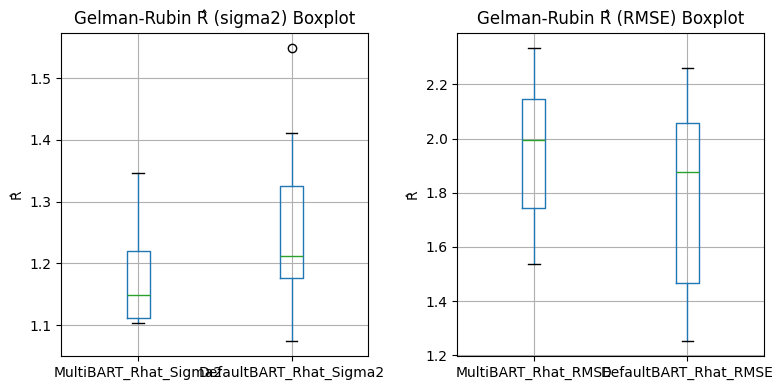

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-10-08 00:39:09,466:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 00:39:09,649:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 00:39:09,897:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
      bart_mtmh      bart       btz        rf       xgb
0      4.916605  5.232273  5.104809  5.589895  4.979682
1      5.212569  5.102181  5.248179  5.432268  5.127210
2      5.890785  5.652957  5.796419  6.299254  5.629927
3      5.067439  5.036406  5.033213  5.530794  4.817914
4      4.708709  4.603640  4.771438  5.215962  4.582971
5      5.535175  5.347821  5.467197  5.733474  5.143325
6      5.503808  5.414987  5.330138  6.101167  5.225731
7      5.736685  5.503348  5.743501  5.926201  5.764883
8      5.263470  5.386442  5.036108  5.805397  4.987270
9      5.858666  5.653269  5.734410  5.891254  5.534708
mean   5.369391  5.293332  5.326541  5.752567  5.179362
std    0.402796  0.318221  0.351921  0.323025  0.371391



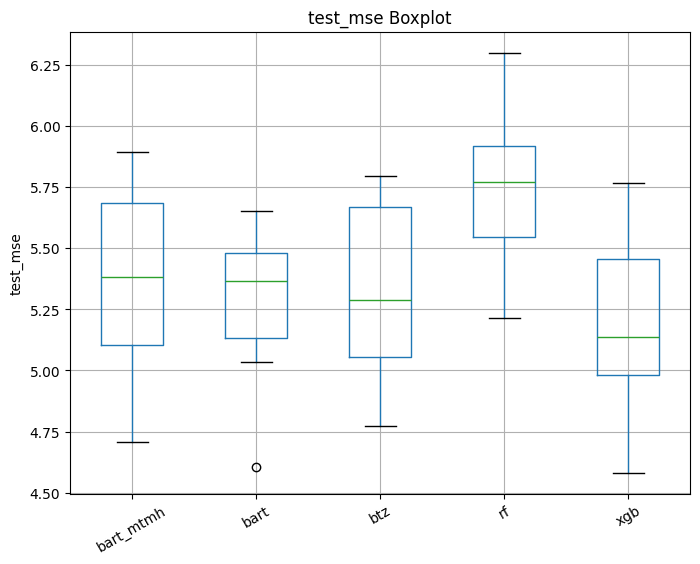

train_mse:
      bart_mtmh      bart       btz        rf       xgb
0      4.418724  4.348036  4.741337  1.255594  3.746580
1      4.336608  4.577943  4.808638  1.276679  3.854301
2      4.172981  4.295620  4.603520  1.182082  3.636553
3      4.269491  4.433068  4.801877  1.146003  3.737375
4      4.304749  4.498329  4.905097  1.119093  3.892717
5      4.196794  4.411788  4.609428  1.148595  3.691684
6      4.178840  4.360253  4.673585  1.212669  3.687814
7      4.199150  4.346370  4.706263  1.157254  3.632611
8      4.322746  4.148205  4.650284  1.241852  3.728342
9      4.181716  4.230336  4.636970  1.144444  3.651574
mean   4.258180  4.364995  4.713700  1.188427  3.725955
std    0.085012  0.124966  0.099315  0.054652  0.088010



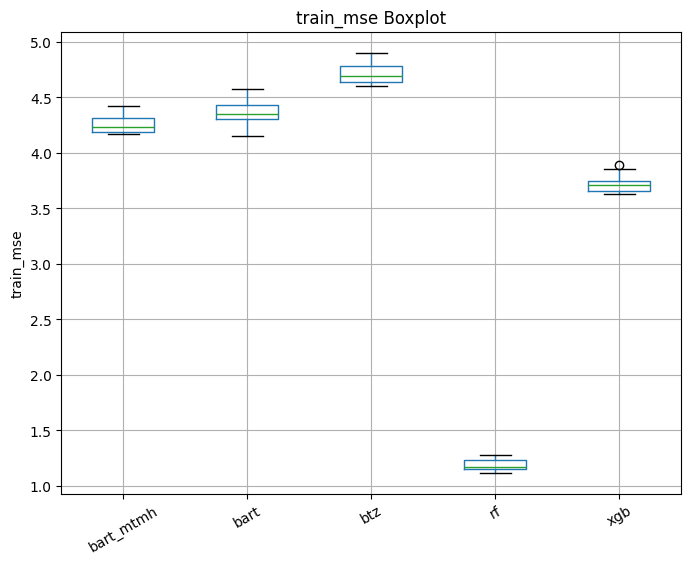

pi_length:
      bart_mtmh      bart       btz
0      8.432048  8.421776  8.941051
1      8.478504  8.590060  9.015239
2      8.213381  8.339363  8.874114
3      8.233927  8.452661  9.133021
4      8.379474  8.521623  9.032530
5      8.126698  8.398253  8.725371
6      8.215100  8.396361  8.893909
7      8.151490  8.484099  8.834267
8      8.416867  8.275440  8.908857
9      8.121384  8.225832  8.976849
mean   8.276887  8.410547  8.933520
std    0.136219  0.110386  0.114066



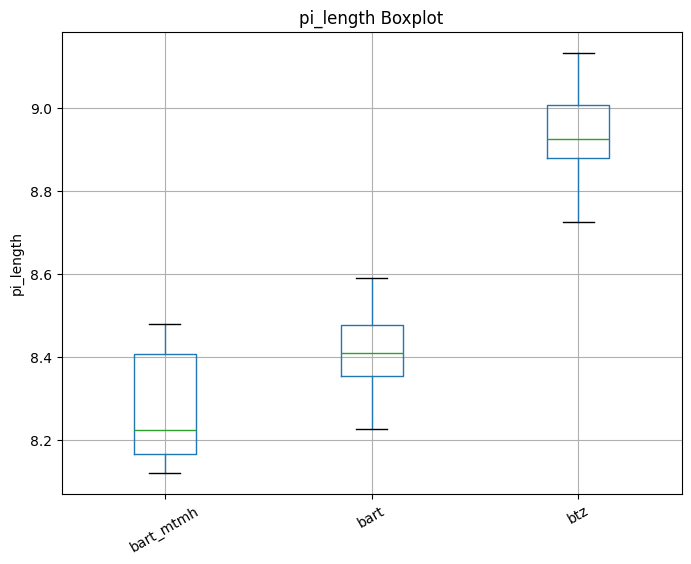

coverage:
      bart_mtmh      bart       btz
0      0.941627  0.936842  0.946411
1      0.932057  0.935885  0.940670
2      0.916746  0.930144  0.933971
3      0.920574  0.937799  0.949282
4      0.939713  0.944498  0.950239
5      0.918660  0.928230  0.927273
6      0.921531  0.930144  0.933971
7      0.914833  0.932057  0.927273
8      0.936842  0.933971  0.943541
9      0.918660  0.919617  0.942584
mean   0.926124  0.932919  0.939522
std    0.010295  0.006652  0.008473



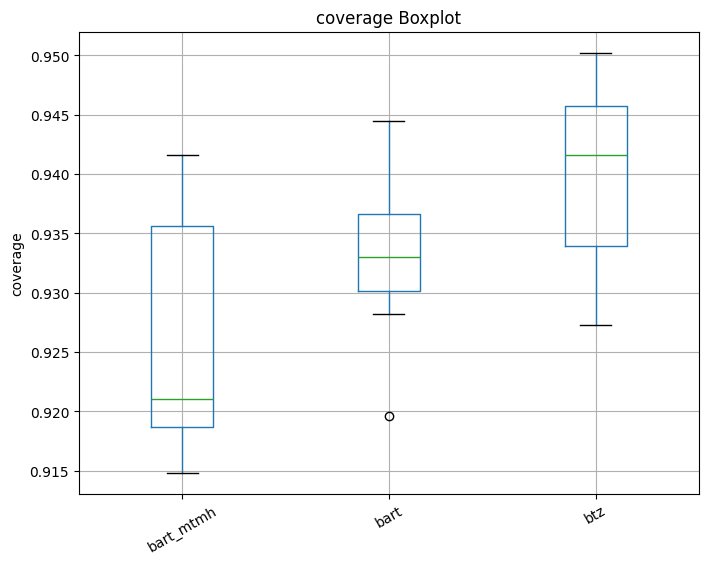

train_time:
      bart_mtmh      bart        btz        rf       xgb
0     10.035501  1.709958   9.520855  0.103148  0.049484
1     10.304827  1.670030   9.829015  0.103250  0.048799
2     10.488005  1.618644   9.589525  0.104841  0.049062
3     10.452264  1.633777   9.058063  0.120066  0.118144
4      9.779978  1.550372   9.853621  0.101774  0.048127
5     10.394332  1.537259   9.741818  0.071352  0.035434
6     10.958047  1.741898   9.616610  0.102965  0.051500
7     10.440792  1.765423   9.913700  0.104612  0.051617
8     10.200559  1.733309  10.156411  0.105372  0.051890
9      9.559930  1.515460   9.873180  0.076334  0.050586
mean  10.261424  1.647613   9.715280  0.099371  0.055464
std    0.394883  0.091062   0.295703  0.014474  0.022539



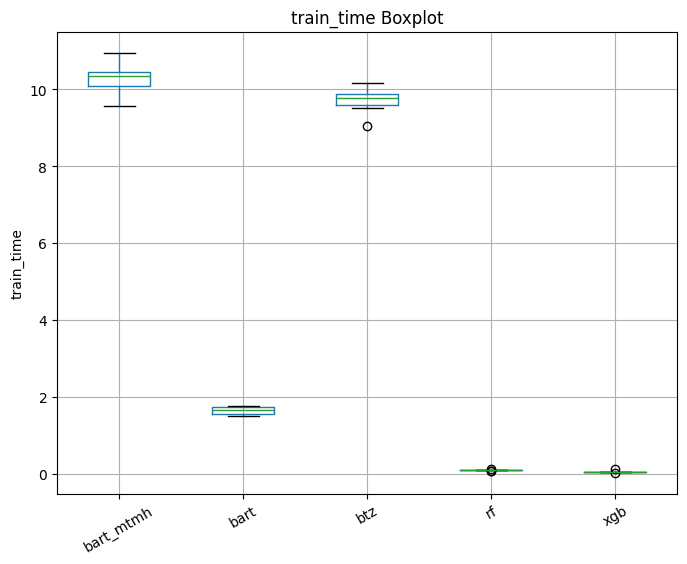

In [13]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=nskip, n_post=ndpost, n_trees=n_trees, n_jobs=-2)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [14]:
for k, v in mse_results.items():
    csv_name = f"results/real1_Abalone_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [15]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real1_Abalone_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1, 5, 10, 50, 100],
    n_runs=10, n_chains=4,
    ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real1_Abalone_tries.csv", index=False)

In [16]:
import pandas as pd
df = pd.read_csv("results/real1_Abalone_tries.csv")
print(df)

   multi_tries  Rhat_Sigma2  Rhat_RMSE  Test_MSE  Coverage  Train_Time
0            1     1.202828   1.585692  5.301155  0.932057    4.617770
1            5     1.125976   1.661612  5.359890  0.931388    7.205085
2           10     1.177680   1.947471  5.334849  0.927943   10.433161
3           50     1.204665   1.399727  5.350989  0.926507   38.640973
4          100     1.226162   1.612166  5.332719  0.926507   73.893472
